# NYC ROLLING SALES Data Visualization <hr style="border:2.5px solid #126782"></hr>

Name: **Nikki Grace D. Magdali** <br>
Course: **CPE2A**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Overview of the Dataset


In [113]:
df = pd.read_csv(r"C:\Users\ngrac\OneDrive\Documents\TUP\Midterm\MATH EDA\MATH EDA_MAGDALI\Endterm\Raw\nyc-rolling-sales-cleaned.csv", delimiter = ",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         69987 non-null  int64  
 1   NEIGHBORHOOD                    69987 non-null  object 
 2   BUILDING CLASS CATEGORY         69987 non-null  object 
 3   TAX CLASS AT PRESENT            69314 non-null  object 
 4   BLOCK                           69987 non-null  int64  
 5   LOT                             69987 non-null  int64  
 6   BUILDING CLASS AT PRESENT       69314 non-null  object 
 7   ADDRESS                         69987 non-null  object 
 8   APARTMENT NUMBER                15496 non-null  object 
 9   ZIP CODE                        69987 non-null  int64  
 10  RESIDENTIAL UNITS               69987 non-null  int64  
 11  COMMERCIAL UNITS                69987 non-null  int64  
 12  TOTAL UNITS                     

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69987 entries, 0 to 69986
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         69987 non-null  int64  
 1   NEIGHBORHOOD                    69987 non-null  object 
 2   BUILDING CLASS CATEGORY         69987 non-null  object 
 3   TAX CLASS AT PRESENT            69314 non-null  object 
 4   BLOCK                           69987 non-null  int64  
 5   LOT                             69987 non-null  int64  
 6   BUILDING CLASS AT PRESENT       69314 non-null  object 
 7   ADDRESS                         69987 non-null  object 
 8   APARTMENT NUMBER                15496 non-null  object 
 9   ZIP CODE                        69987 non-null  int64  
 10  RESIDENTIAL UNITS               69987 non-null  int64  
 11  COMMERCIAL UNITS                69987 non-null  int64  
 12  TOTAL UNITS                     

In [115]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,year,month
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,NaN,10009,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,NaN,10009,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016,9
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,NaN,10009,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016,11
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,NaN,10009,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016,9
4,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,NaN,10009,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016,11


**Borough Mapping** 

In [116]:
# Create a dictionary for borough mapping
borough_mapping = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}

In [117]:
df_boroughs = pd.DataFrame(list(borough_mapping.items()), columns=["BOROUGH Number", "Borough Name"])

In [118]:
df_boroughs

,BOROUGH Number,Borough Name
0,1,Manhattan
1,2,Bronx
2,3,Brooklyn
3,4,Queens
4,5,Staten Island


**Count Properpties in Each Borough**

In [119]:
borough_counts = df["BOROUGH"].value_counts().reset_index()

In [120]:
borough_counts.columns = ["BOROUGH Number", "Property Count"]

In [121]:
borough_mapping = {1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Island"}
borough_counts["Borough Name"] = borough_counts["BOROUGH Number"].map(borough_mapping)

In [122]:
print(borough_counts)

   BOROUGH Number  Property Count   Borough Name
0               3           24047       Brooklyn
1               4           18441         Queens
2               1           14439      Manhattan
3               2            7049          Bronx
4               5            6011  Staten Island


In [123]:
borough_counts = borough_counts.sort_values(by="Property Count", ascending=False)

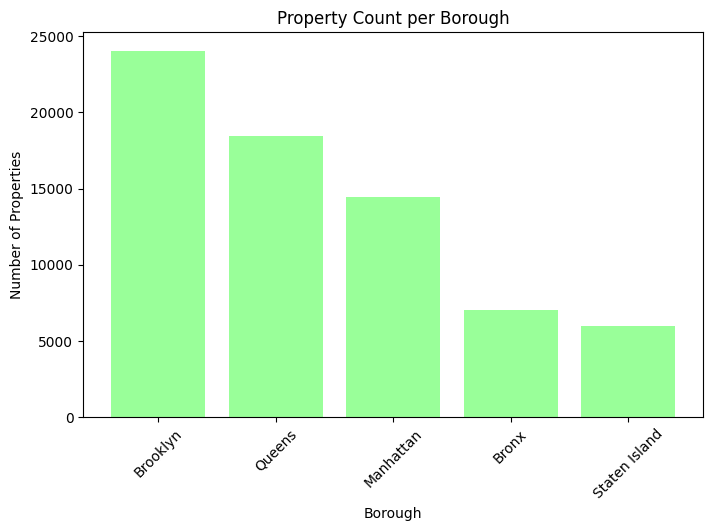

In [124]:


colors = ["skyblue", "green", "pink", "gray", "blue"]


plt.figure(figsize=(8, 5))
plt.bar(borough_counts["Borough Name"], borough_counts["Property Count"], color=["#99ff99", "#99ff99", "#99ff99", "#99ff99", "#99ff99"],)

# Add labels and title
plt.xlabel("Borough")
plt.ylabel("Number of Properties")
plt.title("Property Count per Borough")


plt.xticks(rotation=45)


plt.show()


# Display the SALE PRICE of Each Borough and Percentage Increase

**Brooklyn** Sale Price

In [125]:
brooklyn_sales = df[df["BOROUGH"] == 3]

In [126]:
brooklyn_yearly_prices = brooklyn_sales.groupby("year")["SALE PRICE"].mean().reset_index()

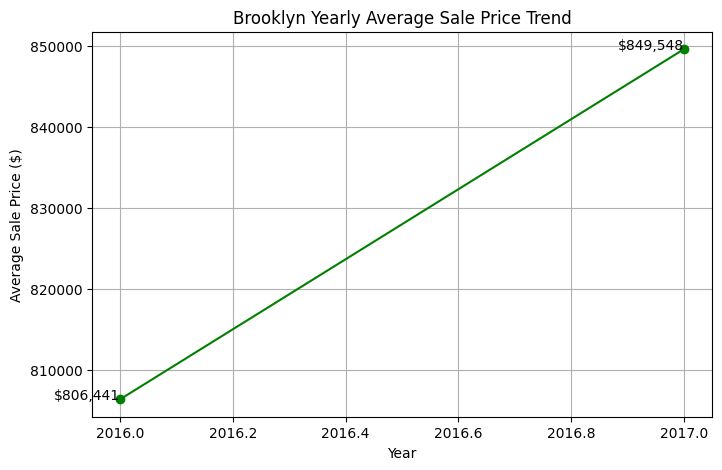

In [127]:
plt.figure(figsize=(8, 5))
plt.plot(brooklyn_yearly_prices["year"], brooklyn_yearly_prices["SALE PRICE"], marker='o', linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Average Sale Price ($)")
plt.title("Brooklyn Yearly Average Sale Price Trend")
plt.grid(True)

for i, row in brooklyn_yearly_prices.iterrows():
        plt.text(row["year"], row["SALE PRICE"], f"${row['SALE PRICE']:,.0f}", ha='right', fontsize=10, color='black')

plt.show()

**Display the SALE PRICE increase in 1 year**

In [128]:
price_2016 = brooklyn_yearly_prices.loc[brooklyn_yearly_prices["year"] == 2016, "SALE PRICE"].values[0]
price_2017 = brooklyn_yearly_prices.loc[brooklyn_yearly_prices["year"] == 2017, "SALE PRICE"].values[0]

In [129]:
percentage_increase = ((price_2017 - price_2016) / price_2016) * 100

In [130]:
print(f"Percentage increase from 2016 to 2017: {percentage_increase:.2f}%")

Percentage increase from 2016 to 2017: 5.35%


**Queens** Sale Price

In [131]:
queens_sales = df[df["BOROUGH"] == 4]

In [132]:
queens_yearly_prices = queens_sales.groupby("year")["SALE PRICE"].mean().reset_index()

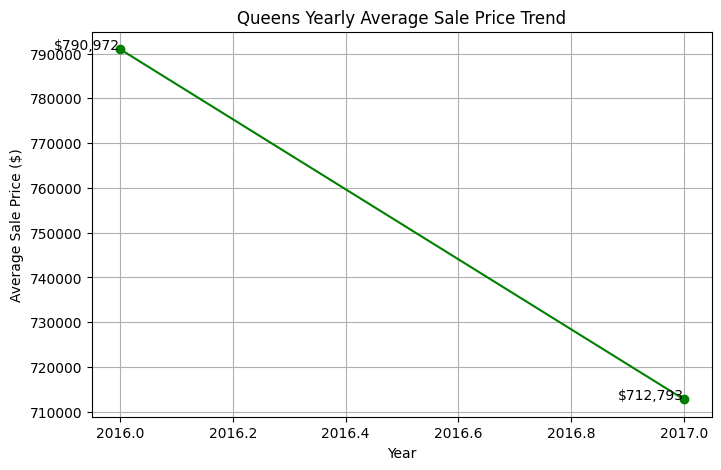

In [133]:
plt.figure(figsize=(8, 5))
plt.plot(queens_yearly_prices["year"], queens_yearly_prices["SALE PRICE"], marker='o', linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Average Sale Price ($)")
plt.title("Queens Yearly Average Sale Price Trend")
plt.grid(True)

for i, row in queens_yearly_prices.iterrows():
        plt.text(row["year"], row["SALE PRICE"], f"${row['SALE PRICE']:,.0f}", ha='right', fontsize=10, color='black')

plt.show()

**Display the SALE PRICE increase in 1 year**

In [134]:
price_2016 = queens_yearly_prices.loc[queens_yearly_prices["year"] == 2016, "SALE PRICE"].values[0]
price_2017 = queens_yearly_prices.loc[queens_yearly_prices["year"] == 2017, "SALE PRICE"].values[0]

In [135]:
percentage_increase = ((price_2017 - price_2016) / price_2016) * 100

In [136]:
print(f"Percentage increase from 2016 to 2017: {percentage_increase:.2f}%")

Percentage increase from 2016 to 2017: -9.88%


**Manhattan** Sale Price

In [137]:
manhattan_sales = df[df["BOROUGH"] == 1]

In [138]:
manhattan_yearly_prices = manhattan_sales.groupby("year")["SALE PRICE"].mean().reset_index()

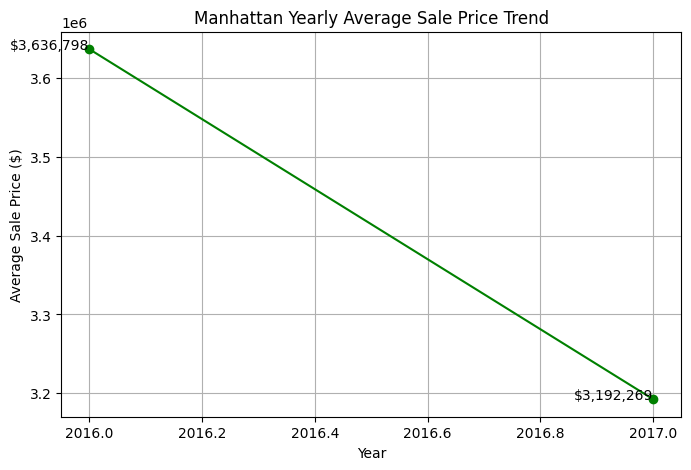

In [139]:
plt.figure(figsize=(8, 5))
plt.plot(manhattan_yearly_prices["year"], manhattan_yearly_prices["SALE PRICE"], marker='o', linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Average Sale Price ($)")
plt.title("Manhattan Yearly Average Sale Price Trend")
plt.grid(True)

for i, row in manhattan_yearly_prices.iterrows():
        plt.text(row["year"], row["SALE PRICE"], f"${row['SALE PRICE']:,.0f}", ha='right', fontsize=10, color='black')

plt.show()

**Display the SALE PRICE increase in 1 year**

In [169]:
price_2016 = manhattan_yearly_prices.loc[manhattan_yearly_prices["year"] == 2016, "SALE PRICE"].values[0]
price_2017 = manhattan_yearly_prices.loc[manhattan_yearly_prices["year"] == 2017, "SALE PRICE"].values[0]

In [172]:
percentage_increase = ((price_2017 - price_2016) / price_2016) * 100

In [173]:
print(f"Percentage increase from 2016 to 2017: {percentage_increase:.2f}%")

Percentage increase from 2016 to 2017: -12.22%


**Bronx** Sale Price

In [143]:
bronx_sales = df[df["BOROUGH"] == 2]

In [144]:
bronx_yearly_prices = bronx_sales.groupby("year")["SALE PRICE"].mean().reset_index()

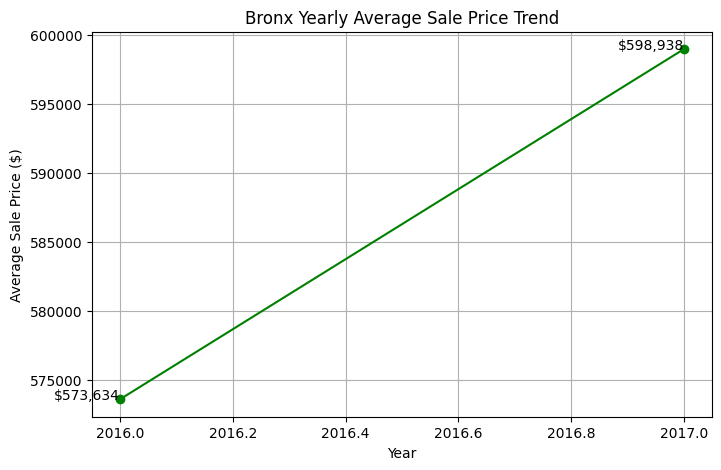

In [145]:
plt.figure(figsize=(8, 5))
plt.plot(bronx_yearly_prices["year"], bronx_yearly_prices["SALE PRICE"], marker='o', linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Average Sale Price ($)")
plt.title("Bronx Yearly Average Sale Price Trend")
plt.grid(True)

for i, row in bronx_yearly_prices.iterrows():
        plt.text(row["year"], row["SALE PRICE"], f"${row['SALE PRICE']:,.0f}", ha='right', fontsize=10, color='black')

plt.show()

**Display the SALE PRICE increase in 1 year**

In [146]:
price_2016 = bronx_yearly_prices.loc[bronx_yearly_prices["year"] == 2016, "SALE PRICE"].values[0]
price_2017 = bronx_yearly_prices.loc[bronx_yearly_prices["year"] == 2017, "SALE PRICE"].values[0]

In [147]:
percentage_increase = ((price_2017 - price_2016) / price_2016) * 100

In [148]:
print(f"Percentage increase from 2016 to 2017: {percentage_increase:.2f}%")

Percentage increase from 2016 to 2017: 4.41%


**Staten Islands** Sale Price

In [149]:
staten_sales = df[df["BOROUGH"] == 5]

In [150]:
staten_yearly_prices = staten_sales.groupby("year")["SALE PRICE"].mean().reset_index()

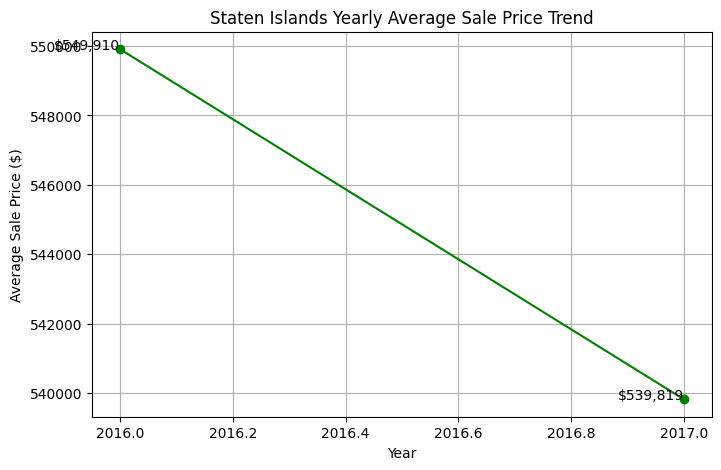

In [151]:
plt.figure(figsize=(8, 5))
plt.plot(staten_yearly_prices["year"], staten_yearly_prices["SALE PRICE"], marker='o', linestyle='-', color='green')
plt.xlabel("Year")
plt.ylabel("Average Sale Price ($)")
plt.title("Staten Islands Yearly Average Sale Price Trend")
plt.grid(True)

for i, row in staten_yearly_prices.iterrows():
        plt.text(row["year"], row["SALE PRICE"], f"${row['SALE PRICE']:,.0f}", ha='right', fontsize=10, color='black')

plt.show()

**Display the SALE PRICE increase in 1 year**

In [152]:
price_2016 = staten_yearly_prices.loc[staten_yearly_prices["year"] == 2016, "SALE PRICE"].values[0]
price_2017 = staten_yearly_prices.loc[staten_yearly_prices["year"] == 2017, "SALE PRICE"].values[0]

In [153]:
percentage_increase = ((price_2017 - price_2016) / price_2016) * 100

In [154]:
print(f"Percentage increase from 2016 to 2017: {percentage_increase:.2f}%")

Percentage increase from 2016 to 2017: -1.84%


**Show the increase or decrease rate on SALE PRICE for each Borough**

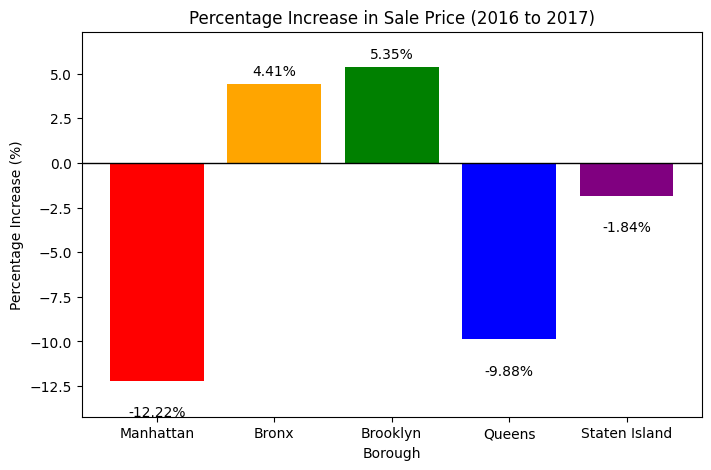

In [175]:
boroughs = ["Manhattan", "Bronx", "Brooklyn", "Queens", "Staten Island"]
percentage_increase = [-12.22, 4.41, 5.35, -9.88, -1.84]


plt.figure(figsize=(8, 5))
bars = plt.bar(boroughs, percentage_increase, color=["red", "orange", "green", "blue", "purple"])


plt.xlabel("Borough")
plt.ylabel("Percentage Increase (%)")
plt.title("Percentage Increase in Sale Price (2016 to 2017)")


plt.ylim(min(percentage_increase) - 2, max(percentage_increase) + 2)


for bar, v in zip(bars, percentage_increase):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + (0.5 if height > 0 else -2), f"{v:.2f}%", 
             ha='center', fontsize=10, color='black')


plt.axhline(0, color='black', linewidth=1)  # Add horizontal line at y=0 for reference
plt.show()


# Average SALE PRICE in each Borough

In [158]:
# Calculate average sale price for each borough
borough_avg_prices = df.groupby("BOROUGH")["SALE PRICE"].mean().reset_index()

In [159]:
borough_names = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}
borough_avg_prices["Borough Name"] = borough_avg_prices["BOROUGH"].map(borough_names)

In [160]:
borough_avg_prices["Borough Name"] = borough_avg_prices["BOROUGH"].map(borough_names)


In [161]:
# Sort by sale price
borough_avg_prices = borough_avg_prices.sort_values(by="SALE PRICE", ascending=False)

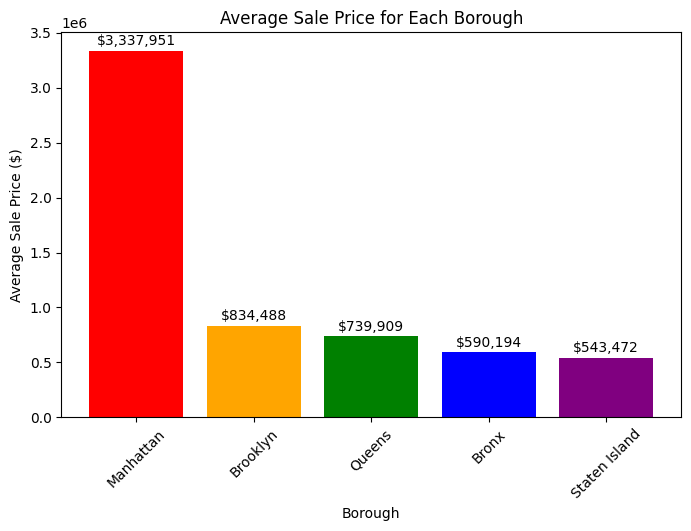

In [162]:
plt.figure(figsize=(8, 5))
plt.bar(borough_avg_prices["Borough Name"], borough_avg_prices["SALE PRICE"], 
        color=["red", "orange", "green", "blue", "purple"])

# Add labels and title
plt.xlabel("Borough")
plt.ylabel("Average Sale Price ($)")
plt.title("Average Sale Price for Each Borough")

# Display values on top of bars
for i, v in enumerate(borough_avg_prices["SALE PRICE"]):
    plt.text(i, v + 50000, f"${v:,.0f}", ha='center', fontsize=10, color='black')

plt.xticks(rotation=45)  # Rotate borough names for readability
plt.show()

# Median vs. Average Sale Price

In [180]:
borough_names = {
    1: "Manhattan",
    2: "Bronx",
    3: "Brooklyn",
    4: "Queens",
    5: "Staten Island"
}
df["Borough Name"] = df["BOROUGH"].map(borough_names)

In [181]:
# Calculate mean and median sale prices
borough_stats = df.groupby("Borough Name")["SALE PRICE"].agg(["mean", "median"]).reset_index()

In [182]:
boroughs = borough_stats["Borough Name"]
avg_prices = borough_stats["mean"]
median_prices = borough_stats["median"]


In [183]:
x = np.arange(len(boroughs))
width = 0.4  # Width of bars


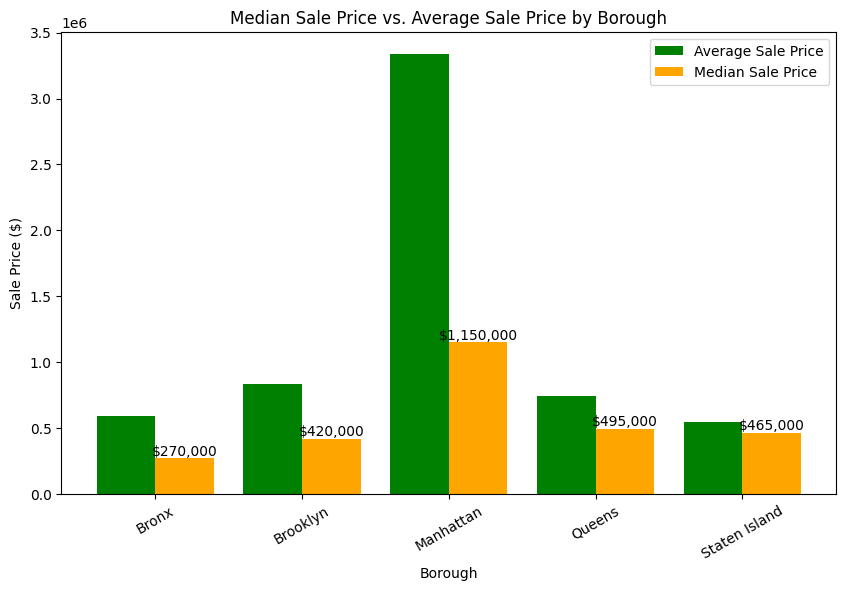

In [188]:

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, avg_prices, width, label="Average Sale Price", color="green")
plt.bar(x + width/2, median_prices, width, label="Median Sale Price", color="orange")


plt.xlabel("Borough")
plt.ylabel("Sale Price ($)")
plt.title("Median Sale Price vs. Average Sale Price by Borough")
plt.xticks(x, boroughs, rotation=30)

for i in range(len(boroughs)):
    plt.text(x[i] - width/2, avg_prices[i], f"${avg_prices[i]:,.0f}", ha='center', va='bottom', fontsize=10, color='white', fontweight='bold')
    plt.text(x[i] + width/2, median_prices[i], f"${median_prices[i]:,.0f}", ha='center', va='bottom', fontsize=10, color='black')


plt.legend()


plt.show()

# Monthly Trends in Sale Prices (Seasonal)

In [190]:
monthly_trends = df.groupby("month")["SALE PRICE"].mean().reset_index()

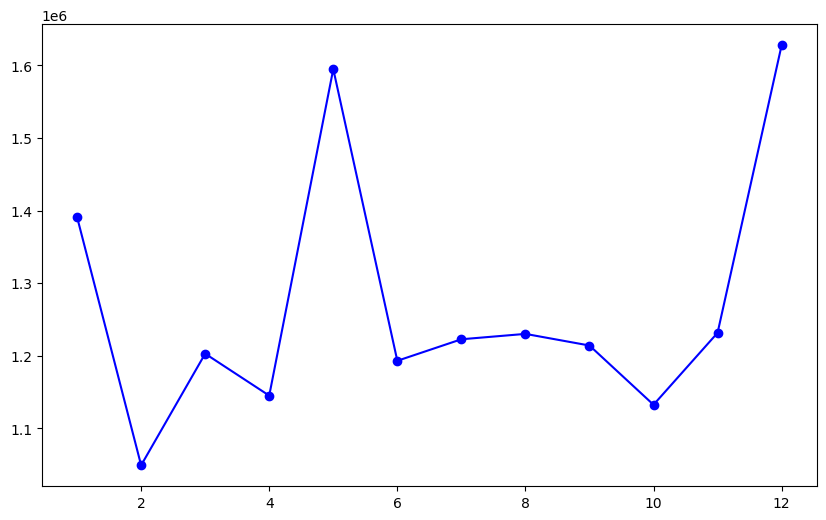

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends["month"], monthly_trends["SALE PRICE"], marker='o', linestyle='-', color='blue')


df_filtered = df[df["SALE PRICE"] < df["SALE PRICE"].quantile(0.99)]


monthly_trends = df_filtered.groupby("month")["SALE PRICE"].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(monthly_trends["month"], monthly_trends["SALE PRICE"], marker='o', linestyle='-', color='blue')


plt.xlabel("Month")
plt.ylabel("Average Sale Price ($)")
plt.title("Monthly Trends in Sale Prices")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]) s
plt.yscale("log")  # Use log scale to handle large variations
plt.grid(True)


for i, row in monthly_trends.iterrows():
    plt.text(row["month"], row["SALE PRICE"], f"${row['SALE PRICE']:,.0f}", ha='center', fontsize=10, color='black')

# Show the plot
plt.show()


**Recommendations:**


To enhance decision-making, real estate stakeholders should focus on borough-specific market trends and identify emerging investment opportunities in high-growth areas like Brooklyn and the Bronx. Developers should consider increasing affordable housing projects in boroughs with rising demand. Further research should incorporate external economic factors such as interest rates and employment trends to better predict market shifts. Additionally, leveraging machine learning models for predictive analysis can provide deeper insights into future price movements and buyer preferences.



**Conclusion:**


The NYC real estate market exhibits dynamic trends, with significant variations across boroughs. While Manhattan retains its premium market status, Brooklyn and the Bronx present growing investment potential. The dataset provides valuable transparency but also highlights the need for more comprehensive data integration to fully understand market behaviors. By refining data analysis approaches and considering external market drivers, real estate professionals and policymakers can make informed decisions to foster sustainable growth and equitable housing opportunities in New York City.